```
From: https://github.com/ksatola
Version: 0.0.1

TODOs
1. 

```

# Supervised Filter-Based Feature Selection Methods
It is common to use correlation type statistical measures between input and output variables as the basis for filter feature selection. As such, the choice of statistical measures is highly dependent upon the variable data types:
- Numerical Variables
- Categorical Variables

`Input variables` are those that are provided as input to a model. In feature selection, it is this group of variables that we wish to reduce in size. `Output variables` are those for which a model is intended to predict, often called the response variable.
- Numerical Output: Regression predictive modeling problem.
- Categorical Output: Classification predictive modeling problem.


**Numerical Input, Numerical Output**
- This is a regression predictive modeling problem with numerical input variables.
- Pearson’s correlation coefficient (linear).
- Spearman’s rank coefficient (nonlinear)
- Mutual Information.
    
**Numerical Input, Categorical Output**
- This is a classification predictive modeling problem with numerical input variables.
- ANOVA correlation coefficient (linear).
- Kendall’s rank coefficient (nonlinear). Kendall does assume that the categorical variable is ordinal.
    
**Categorical Input, Categorical Output**
- This is a classification predictive modeling problem with categorical input variables.
- Chi-Squared test (contingency tables).
- Mutual Information. A powerful method that may prove useful for both categorical and numerical data. It is agnostic to the data types.
    
Two of the more popular `filter methods` include:
- Select the top k variables: [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)
- Select the top percentile variables: [SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html)

Consider `transforming the variables` in order to access different statistical methods. For example, you can transform a categorical variable to ordinal, even if it is not, and see if any interesting results come out. You can also make a numerical variable discrete (e.g. bins); try categorical-based measures. Some statistical measures assume properties of the variables, such as Pearson’s that assumes a Gaussian probability distribution to the observations and a linear relationship. You can transform the data to meet the expectations of the test and try the test regardless of the expectations and compare results.

**There is no best feature selection method.** Just like there is no best set of input variables or best machine learning algorithm. At least not universally. Instead, you must discover what works best for your specific problem using careful systematic experimentation. Try a range of different models fit on different subsets of features chosen via different statistical measures and discover what works best for your specific problem.

For more see:
- Other Feature Selection notebooks
- [How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)

In [1]:
# Connect with underlying Python code
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')

In [2]:
from datasets import (
    get_dataset
)

from feature_selection import (
    select_features
)

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

---

## Regression (Numerical Input, Numerical Output)

There are a few feature selection techniques that can be used for numerical input data and a numerical target variable:

1. Correlation Statistics.
1. Mutual Information Statistics.

In [4]:
df_num = get_dataset('boston_housing')
df_num.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# Return a single boolean if there is any cell that is missing in a DataFrame
df_num.isna().any().any()

False

In [6]:
# This dataset contains no missing data
df_num.shape

(506, 14)

## Correlation Statistics
`Correlation` is a measure of how two variables change together. Perhaps the most common correlation measure is `Pearson’s correlation` that **assumes a Gaussian distribution to each variable** and reports on their linear relationship.

Linear correlation scores are typically a value between -1 and 1 with 0 representing no relationship. For feature selection, we are often interested in a positive score with the larger the positive value, the larger the relationship, and, more likely, the feature should be selected for modeling. As such the linear correlation can be converted into a correlation statistic with only positive values.

The results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

The `scikit-learn` machine library provides an implementation of the correlation statistic in the `f_regression()` function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) class.

There are many different techniques for scoring features and selecting features based on scores; how do you know which one to use? **A robust approach is to evaluate models using different feature selection methods (and numbers of features) and select the method that results in a model with the best performance**.

Other statistics:
- Pearson’s Correlation Coefficient: [f_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html) -> used in Classification (Numerical Input, Numerical Output) in this section
- ANOVA: [f_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html) -> used in Classification (Numerical Input, Categorical Output) example below
- Chi-Squared: [chi2()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html) -> used in Classification (Categorical Input, Categorical Output) example below
- Mutual Information: [mutual_info_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) and [mutual_info_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html) -> applicable to all scenarios

Also, the `SciPy` library provides an implementation of many more statistics, such as Kendall’s tau ([kendalltau](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html)) and Spearman’s rank correlation ([spearmanr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)).

In [7]:
y = df_num[['medv']]
X = df_num.drop(columns=['medv'])

crim: 59.573
zn: 42.879
indus: 94.249
chas: 19.033
nox: 69.752
rm: 335.351
age: 49.302
dis: 21.767
rad: 61.144
tax: 90.535
ptratio: 112.477
b: 41.568
lstat: 444.683


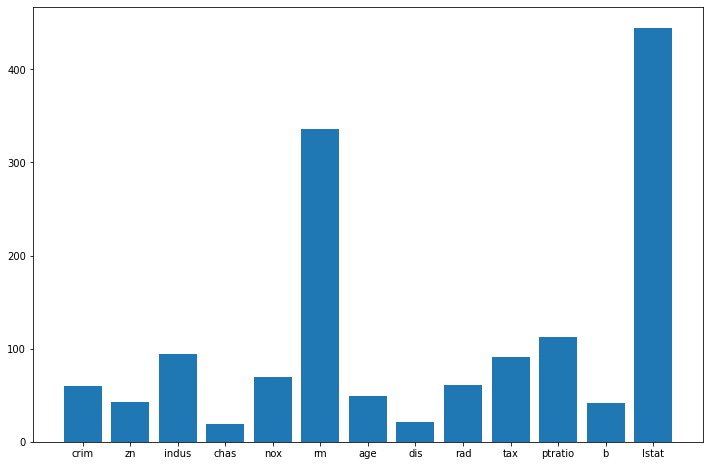

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train.values.ravel(), X_test, k=13, score_func=f_regression)

# What are scores for the features
for i in range(len(fs.scores_)):
    print(f'{X.columns[i]}: {fs.scores_[i]:.3f}')

# Plot the scores
fig, ax = plt.subplots(figsize=(12, 8))
plt.bar([X.columns[i] for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### Mutual Information Feature Selection
Mutual information from the field of information theory is the application of `information gain` (typically used in the construction of decision trees) to feature selection. Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Mutual information is straightforward when considering the distribution of two discrete (categorical or ordinal) variables, such as categorical input and categorical output data. Nevertheless, [it can be adapted for use with numerical input and output data](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3929353/).

The `scikit-learn` machine learning library provides an implementation of mutual information for feature selection with numeric input and output variables via the `mutual_info_regression()` function. Like `f_regression()`, it can be used in the [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) feature selection strategy (and other strategies).

crim: 0.338
zn: 0.161
indus: 0.450
chas: 0.020
nox: 0.418
rm: 0.513
age: 0.292
dis: 0.283
rad: 0.198
tax: 0.320
ptratio: 0.494
b: 0.133
lstat: 0.728


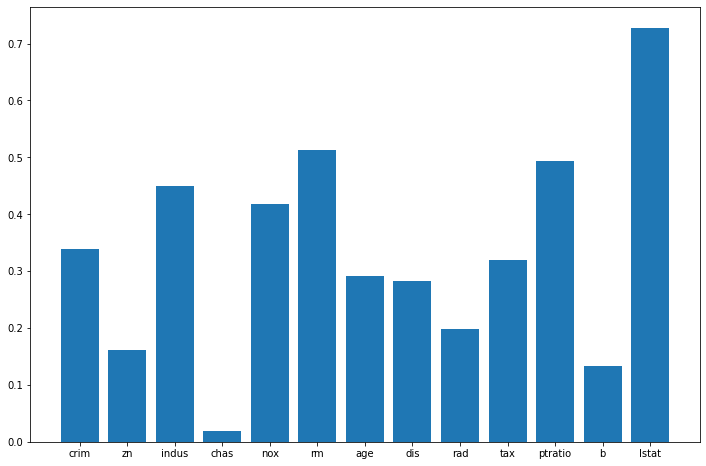

In [9]:
from sklearn.feature_selection import mutual_info_regression

# Feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train.values.ravel(), X_test, k=13, score_func=mutual_info_regression)

# What are scores for the features
for i in range(len(fs.scores_)):
    print(f'{X.columns[i]}: {fs.scores_[i]:.3f}')

# Plot the scores
fig, ax = plt.subplots(figsize=(12, 8))
plt.bar([X.columns[i] for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### Grid Search for Best k Features
Instead of guessing, we can systematically test a range of different numbers of selected features and discover which results in the best performing model. This is called a `grid search`, where the k argument to the `SelectKBest` class can be tuned.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# Define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

We can define a `Pipeline` that correctly prepares the feature selection `transform` on the training set and applies it to the train set and test set for each fold of the `cross-validation`.

In [11]:
# Define the pipeline to evaluate
model = LinearRegression()

fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel', fs), ('lr', model)])

Note that the grid is a dictionary mapping of parameter-to-values to search, and given that we are using a `Pipeline`, we can access the `SelectKBest` object via the name we gave it ‘sel‘ and then the parameter name ‘k‘ separated by two underscores, or ‘sel__k‘.

In [12]:
# Define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-20, X.shape[1]+1)]

In this case, we will evaluate models using the negative mean absolute error (`neg_mean_absolute_error`). **It is negative because the scikit-learn requires the score to be maximized, so the MAE is made negative, meaning scores scale from -infinity to 0 (best)**.

In [13]:
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [14]:
# Define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

# Perform the search
results = search.fit(X, y.values.ravel())

In [15]:
# Summarize best results
print(f'Best MAE: {results.best_score_}.3f')
print(f'Best Config: {results.best_params_}')

# Summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']

for mean, param in zip(means, params):
    print(f">{mean:.3f} with: {param}")

Best MAE: -3.3907648113211915.3f
Best Config: {'sel__k': 13}
>nan with: {'sel__k': -7}
>nan with: {'sel__k': -6}
>nan with: {'sel__k': -5}
>nan with: {'sel__k': -4}
>nan with: {'sel__k': -3}
>nan with: {'sel__k': -2}
>nan with: {'sel__k': -1}
>nan with: {'sel__k': 0}
>-4.522 with: {'sel__k': 1}
>-4.036 with: {'sel__k': 2}
>-3.955 with: {'sel__k': 3}
>-3.920 with: {'sel__k': 4}
>-3.694 with: {'sel__k': 5}
>-3.673 with: {'sel__k': 6}
>-3.674 with: {'sel__k': 7}
>-3.648 with: {'sel__k': 8}
>-3.556 with: {'sel__k': 9}
>-3.537 with: {'sel__k': 10}
>-3.471 with: {'sel__k': 11}
>-3.398 with: {'sel__k': 12}
>-3.391 with: {'sel__k': 13}


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
>1 -4.522 (0.482)
>2 -4.002 (0.521)
>3 -3.939 (0.573)
>4 -3.876 (0.556)
>5 -3.694 (0.542)
>6 -3.675 (0.548)
>7 -3.674 (0.546)
>8 -3.654 (0.533)
>9 -3.556 (0.522)
>10 -3.535 (0.493)
>11 -3.486 (0.506)
>12 -3.398 (0.521)
>13 -3.391 (0.530)


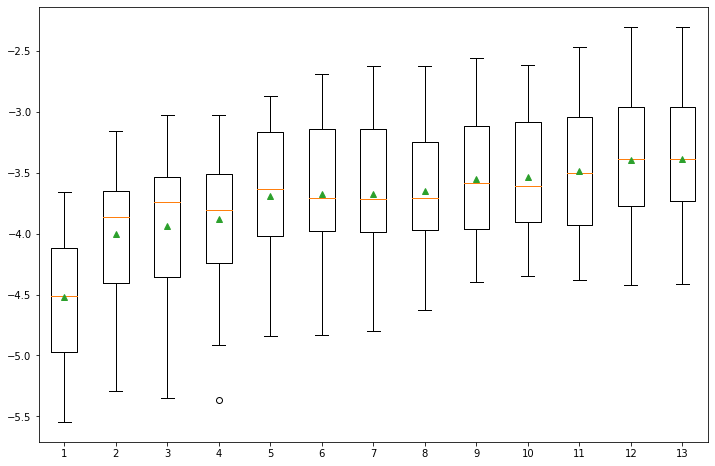

In [16]:
# Compare different numbers of features selected using mutual information
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot


# Define number of features to evaluate
num_features = [i for i in range(1, X.shape[1]+1)]
print(num_features)

# Enumerate each number of features
results = list()

for k in num_features:
    
    # Create pipeline
    model = LinearRegression()
    fs = SelectKBest(score_func=mutual_info_regression, k=k)
    pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])

    # Evaluate the model
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y.values.ravel(), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    results.append(scores)

    # Summarize the results
    print(f'>{k} {mean(scores):.3f} ({std(scores):.3f})')

# Plot model performance for comparison
fig, ax = plt.subplots(figsize=(12, 8))
plt.boxplot(results, labels=num_features, showmeans=True)
plt.show()

Box and whisker plots are created side by side showing the trend of `k vs. MAE` where the green triangle represents the `mean` and orange line represents the `median` of the distribution. Running the example `grid searches` different numbers of selected features using `mutual information statistics`, where each modeling pipeline is evaluated using repeated `cross-validation`.

---

## Classification (Numerical Input, Categorical Output)
Feature selection is performed using [ANOVA F](https://en.wikipedia.org/wiki/F-test) measure via the [f_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html) function.

In [17]:
df = get_dataset('titanic3')

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics)
df_num = df_num.drop('body', axis=1)
df_num.dropna(inplace=True)
df_num.head()

,pclass,survived,age,sibsp,parch,fare
0,1,1,29.0000,0,0,211.3375
1,1,1,0.9167,1,2,151.5500
2,1,0,2.0000,1,2,151.5500
3,1,0,30.0000,1,2,151.5500
4,1,0,25.0000,1,2,151.5500


In [18]:
# Return a single boolean if there is any cell that is missing in a DataFrame
df_num.isna().any().any()

False

In [19]:
# This dataset contains no missing data
df_num.shape

(1045, 6)

In [20]:
y = df_num[['survived']]
X = df_num.drop(columns=['survived'])

pclass: 87.392
age: 4.123
sibsp: 0.329
parch: 10.493
fare: 45.512


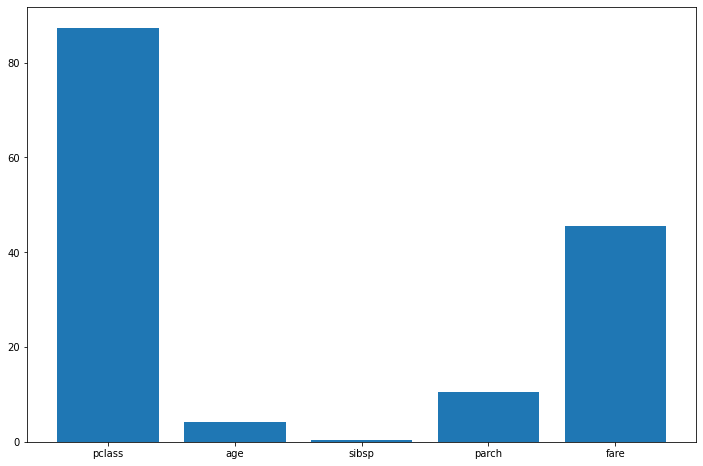

In [21]:
from sklearn.feature_selection import f_classif

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train.values.ravel(), X_test, k=5, score_func=f_classif)

# What are scores for the features
for i in range(len(fs.scores_)):
    print(f'{X.columns[i]}: {fs.scores_[i]:.3f}')

# Plot the scores
fig, ax = plt.subplots(figsize=(12, 8))
plt.bar([X.columns[i] for i in range(len(fs.scores_))], fs.scores_)
plt.show()

---

## Classification (Categorical Input, Categorical Output)
Feature selection is often straightforward when working with real-valued data, such as using the Pearson’s correlation coefficient, but can be challenging when working with categorical data.

The two most commonly used feature selection methods for categorical input data when the target variable is also categorical (e.g. classification predictive modeling) are the `chi-squared` statistic and the `mutual information statistic`.

### Load Dataset

In [22]:
# target = 'class'
df = get_dataset('breast-cancer')
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


In [23]:
df.shape

(285, 10)

In [24]:
df.dropna(inplace=True)

In [25]:
# Return a single boolean if there is any cell that is missing in a DataFrame
df.isna().any().any()

False

In [26]:
df.shape

(276, 10)

In [27]:
y = df[['class']]
X = df.drop(columns=['class'])

In [28]:
# Force all fields in the input data to be string, just in case Pandas tried to map some automatically to numbers (it does try)
X = X.astype(str)

In [29]:
X.dtypes

age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig      object
breast         object
breast-quad    object
irradiat       object
dtype: object

In [30]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

We can use the [OrdinalEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) from scikit-learn to encode each variable to integers. This is a flexible class and does allow the order of the categories to be specified as arguments if any such order is known.

**The best practice when encoding variables is to fit the encoding on the training dataset, then apply it to the train and test datasets.**

### Encode Categorical Variables

In [31]:
from sklearn.preprocessing import OrdinalEncoder

# Prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

In [32]:
X_train.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
40,30-39,premeno,35-39,0-2,no,3,left,left_low,no
268,60-69,ge40,20-24,0-2,no,1,left,left_low,no
118,40-49,premeno,35-39,9-11,yes,2,right,left_up,yes
61,40-49,premeno,30-34,0-2,no,2,right,right_up,yes
103,60-69,ge40,20-24,0-2,no,2,left,left_up,no


In [33]:
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

In [34]:
X_train_enc[:5]

array([[0., 2., 6., 0., 0., 2., 0., 1., 0.],
       [3., 0., 3., 0., 0., 0., 0., 1., 0.],
       [1., 2., 6., 6., 1., 1., 1., 2., 1.],
       [1., 2., 5., 0., 0., 1., 1., 4., 1.],
       [3., 0., 3., 0., 0., 1., 0., 2., 0.]])

It is a binary classification problem, so we need to map the two class labels to 0 and 1. This is a type of ordinal encoding, and scikit-learn provides the [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) class specifically designed for this purpose. We could just as easily use the OrdinalEncoder and achieve the same result, although the LabelEncoder is designed for encoding a single variable.

In [35]:
from sklearn.preprocessing import LabelEncoder

# Prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [36]:
y_train.head()

,class
40,recurrence-events
268,no-recurrence-events
118,no-recurrence-events
61,no-recurrence-events
103,no-recurrence-events


In [37]:
y_train_enc, y_test_enc = prepare_targets(y_train.values.ravel(), y_test.values.ravel())

In [38]:
y_train_enc[:5]

array([1, 0, 0, 0, 0])

### Feature Selection
There are two popular feature selection techniques that can be used for categorical input data and a categorical (class) target variable
- **Chi-Squared Statistic:** `Pearson’s chi-squared statistical hypothesis test` is an example of a **test for independence between categorical variables**. The results of this test can be used for feature selection, where those features that are independent of the target variable can be removed from the dataset.
- **Mutual Information Statistic:** Information gain.

The scikit-learn machine library provides an implementation of the `chi-squared test` in the [chi2()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html) function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) class.

#### Chi-Squared Feature Selection

age: 0.404
menopause: 0.719
tumor-size: 3.715
inv-nodes: 69.727
node-caps: 18.119
deg-malig: 10.227
breast: 0.423
breast-quad: 0.028
irradiat: 3.147


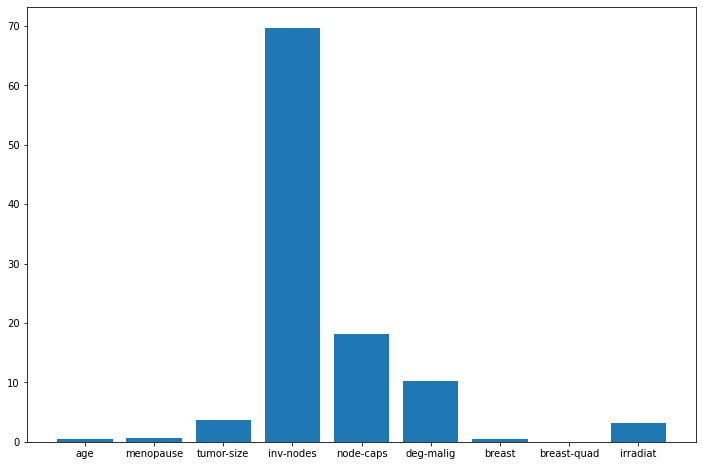

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc, k=5, score_func=chi2)

# What are scores for the features
for i in range(len(fs.scores_)):
    print(f'{X.columns[i]}: {fs.scores_[i]:.3f}')

# Plot the scores
fig, ax = plt.subplots(figsize=(12, 8))
plt.bar([X.columns[i] for i in range(len(fs.scores_))], fs.scores_)
plt.show()

This clearly shows that feature inv-nodes might be the most relevant (according to chi-squared) and that perhaps three of the nine input features are the most relevant. We could set `k=3` When configuring the `SelectKBest` to select these top three features.

In [40]:
X_train_fs[:5]

array([[6., 0., 0., 2., 0.],
       [3., 0., 0., 0., 0.],
       [6., 6., 1., 1., 1.],
       [5., 0., 0., 1., 1.],
       [3., 0., 0., 1., 0.]])

In [41]:
X_test_fs[:5]

array([[4., 0., 0., 2., 0.],
       [5., 0., 0., 1., 0.],
       [4., 0., 0., 0., 0.],
       [5., 0., 0., 2., 0.],
       [3., 0., 0., 2., 1.]])

#### Mutual Information Feature Selection
`Mutual information` from the field of information theory is the application of `information gain` (typically used in the construction of decision trees) to feature selection. Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

The scikit-learn machine learning library provides an implementation of `mutual information for feature selection` via the [mutual_info_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) function. Like `chi2()`, it can be used in the `SelectKBest` feature selection strategy (and other strategies).

age: 0.000
menopause: 0.007
tumor-size: 0.000
inv-nodes: 0.000
node-caps: 0.000
deg-malig: 0.060
breast: 0.036
breast-quad: 0.030
irradiat: 0.000


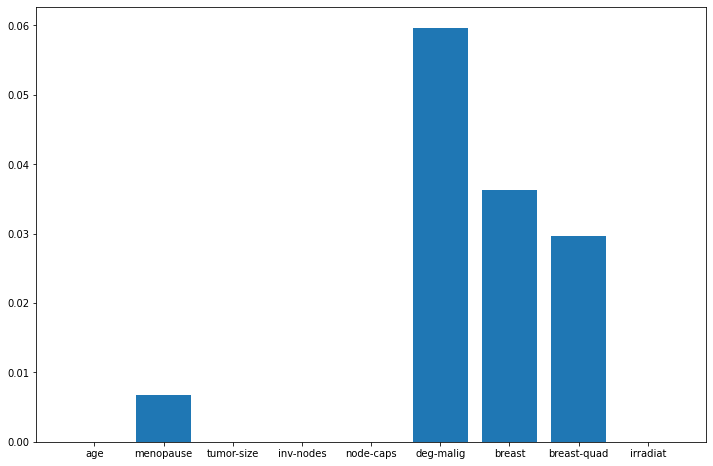

In [42]:
# This cell uses the same code as Mutual Information Feature Selection for Regression
# The only difference is X_train_enc, y_train_enc, X_test_enc passed to the select_features()
from sklearn.feature_selection import mutual_info_regression

# Feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc, k=5, score_func=mutual_info_regression)

# What are scores for the features
for i in range(len(fs.scores_)):
    print(f'{X.columns[i]}: {fs.scores_[i]:.3f}')

# Plot the scores
fig, ax = plt.subplots(figsize=(12, 8))
plt.bar([X.columns[i] for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In this case, we can see that some of the features have a very low score, suggesting that perhaps they can be removed. Perhaps features node-caps, breast-quad, tumor-size, and deg-malig are most relevant.

### Model Built Using All Features

In [43]:
# Evaluate a LogisticRegression model using all the available features
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)

# Predict
yhat = model.predict(X_test_fs)

# Evaluate model predictions
accuracy = accuracy_score(y_test_enc, yhat)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 72.29


To be sure that the effect is real, it would be a good idea to **repeat each experiment multiple times and compare the mean performance**. It may also be a good idea to explore using `k-fold cross-validation` instead of a simple train/test split.